# Data Analysis on Titanic_Survival_Prediction

#### Task -02 Titanic Classificaation (Data science Intern)

Make a system which tells whether the peson will be save from sinking. what factors were mostly likely lead to success-socio-economic status, age, gender and more.

#### Importing required libraries¶

In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Loading datasets

In [2]:
pd.set_option('display.max_columns',10,'display.width',1000)
df_train = pd.read_csv("C:\\Users\\shirisha\\Downloads\\train (1).csv")
df_test = pd.read_csv("C:\\Users\\shirisha\\Downloads\\tested.csv")

##### Display 1st and last 5 rows of both datasets

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,...,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,...,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,...,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,...,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,...,1,3101298,12.2875,NaN,S


In [5]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,...,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,...,0,370376,7.75,NaN,Q


In [6]:
df_test.tail()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,...,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,...,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,...,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,...,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,...,1,2668,22.3583,NaN,C


#### Displaying shape of both datasets

In [9]:
df_train.shape

(891, 12)

In [8]:
df_test.shape

(418, 12)

#### Infomation about both dataset

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#### Checking for Missing values

In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Handling the Missing values

In [13]:
# drop the "Cabin" column from the dataframe
titanic_train= df_train.drop(columns='Cabin', axis=1)

In [14]:
# replacing the missing values in "Age" column with mean value
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)

In [15]:
# finding the mode value of "Embarked" column
print(titanic_train['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [16]:
print(titanic_train['Embarked'].mode()[0])

S


In [17]:
# replacing the missing values in "Embarked" column with mode value
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)

In [18]:
# check the number of missing values in each column
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Description of dataset

In [22]:
# getting some statistical measures about the data
titanic_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,...,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,...,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,1.000000,0.000000,NaN,31.000000,NaN


In [23]:
titanic_train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.415100,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.549778,0.473684,0.464912,48.395408


In [25]:
titanic_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [28]:
male_candidates = len(titanic_train[titanic_train['Sex'] == 'male'])
print("# of Males in Titanic:",male_candidates)

# of Males in Titanic: 577


In [29]:
female_candidates = len(titanic_train[titanic_train['Sex'] == 'female'])
print("# of Females in Titanic:",female_candidates)

# of Females in Titanic: 314


#### EDA

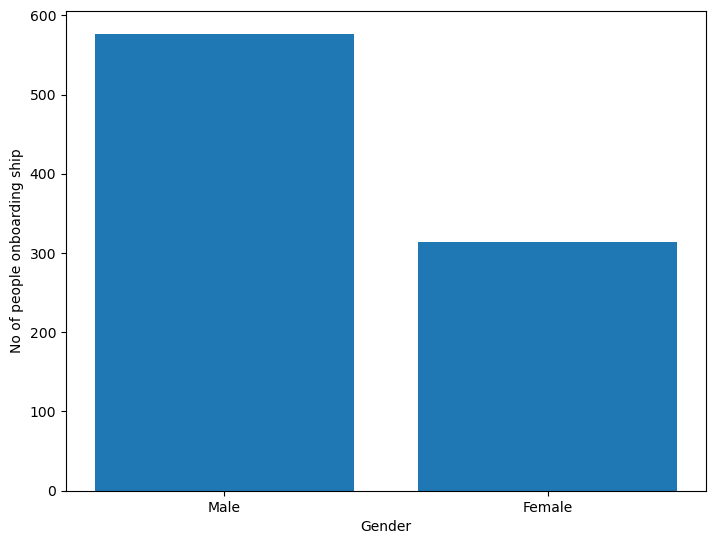

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()


In [32]:
alive = len(titanic_train[titanic_train['Survived'] == 1])
dead = len(titanic_train[titanic_train['Survived'] == 0])

In [33]:
titanic_train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


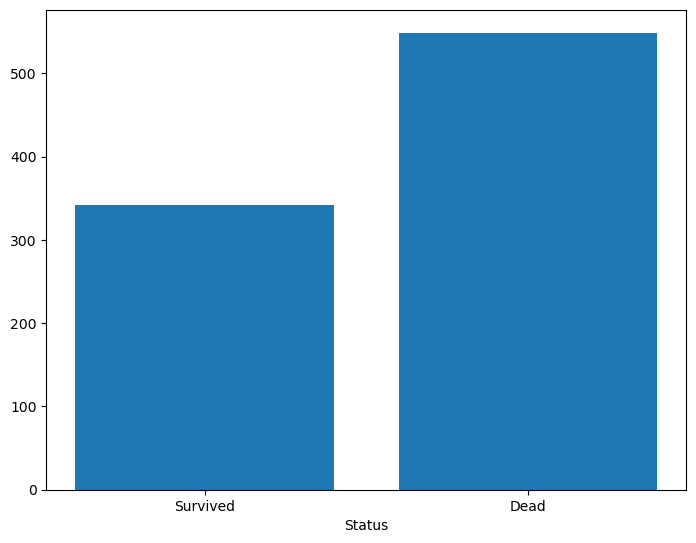

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, "# of people accrding to ticket class in which people couldn't survive")

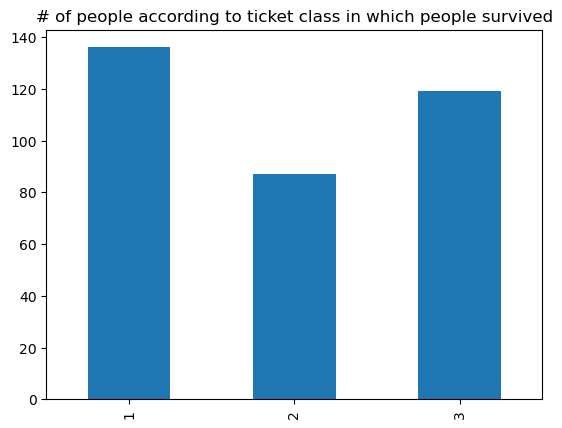

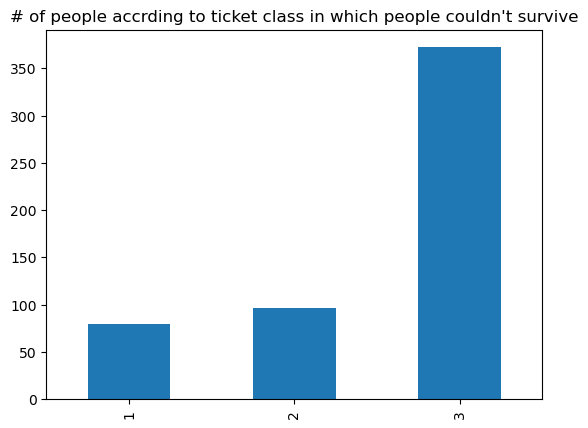

In [40]:
plt.figure(1)
titanic_train.loc[titanic_train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('# of people according to ticket class in which people survived')


plt.figure(2)
titanic_train.loc[titanic_train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('# of people accrding to ticket class in which people couldn\'t survive')

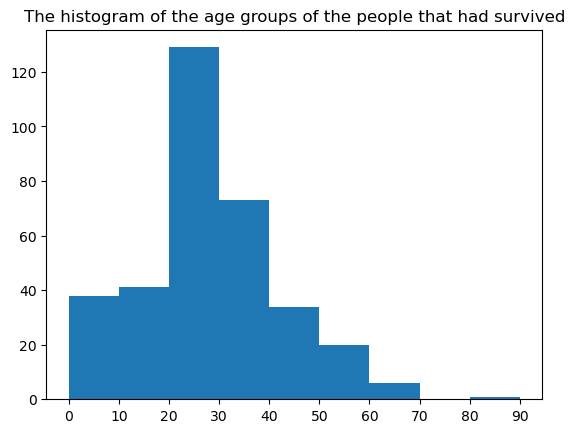

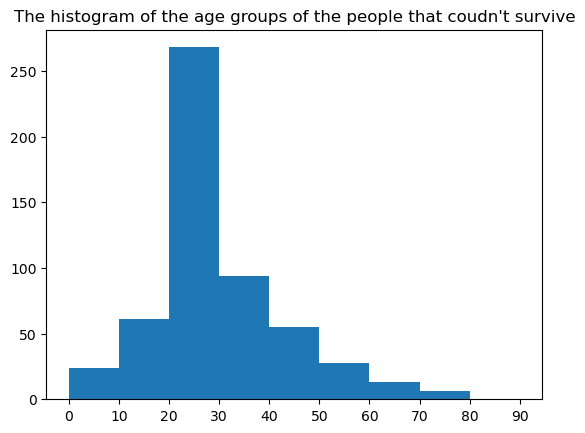

In [42]:
plt.figure(1)
age  = titanic_train.loc[titanic_train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = titanic_train.loc[titanic_train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.show()

In [44]:
titanic_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [45]:
titanic_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [46]:
titanic_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
84,70.00,0.0
85,70.50,0.0
86,71.00,0.0
87,74.00,0.0


In [47]:
titanic_train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


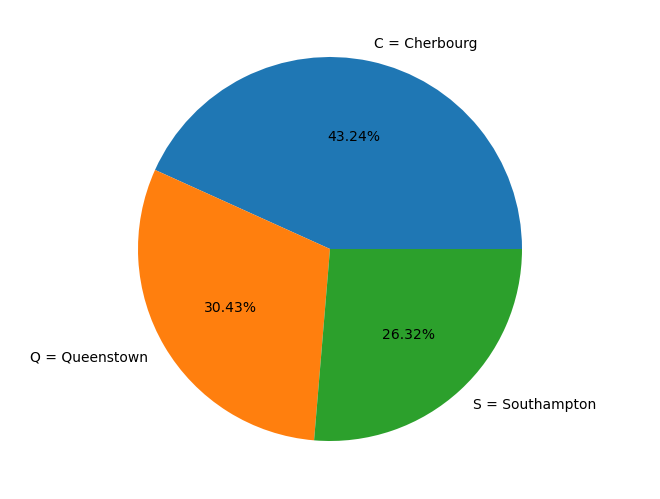

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [50]:
df_test.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,...,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,...,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.500000,NaN,NaN


#### Droping Useless Columns

In [63]:
df_test = df_test.drop(["Cabin"], axis = 1)

In [ ]:
df_test = df_test.drop(['Ticket'], axis = 1)

In [70]:
df_test = df_test.drop(['Name'], axis = 1)

In [72]:
df_train = df_train.drop(['Name'], axis = 1)

In [82]:

X = titanic_train.drop(columns = ['PassengerId','Name','Survived'], axis=1)
Y = titanic_train["Survived"]

In [83]:
print(X)

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.699118      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[891 rows x 7 columns]


In [84]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [114]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [116]:
X['Embarked'] = titanic_train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [118]:
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

KeyError: 0

In [119]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [121]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7574626865671642


In [122]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[130  26]
 [ 39  73]]


In [123]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(Y_test,pred_y))

Acc= 0.6604477611940298


In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [125]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))


Accuracy Score: 0.6492537313432836


In [126]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[126  30]
 [ 64  48]]
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       156
           1       0.62      0.43      0.51       112

    accuracy                           0.65       268
   macro avg       0.64      0.62      0.62       268
weighted avg       0.64      0.65      0.64       268



In [127]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7686567164179104


In [128]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [129]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7201492537313433


In [130]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[124  32]
 [ 43  69]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       156
           1       0.68      0.62      0.65       112

    accuracy                           0.72       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268



In [131]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN
